# Practica 1
## Análisis exploratorio de datos y Extracción de Características
## Autor: Diego Tapia

In [1]:
import pandas as pd
datos =  pd.DataFrame({"manzanas": [3,2], "peras":[1,4]}, index=["Juan", "Diego"])
datos

,manzanas,peras
Juan,3,1
Diego,2,4


<Axes: >

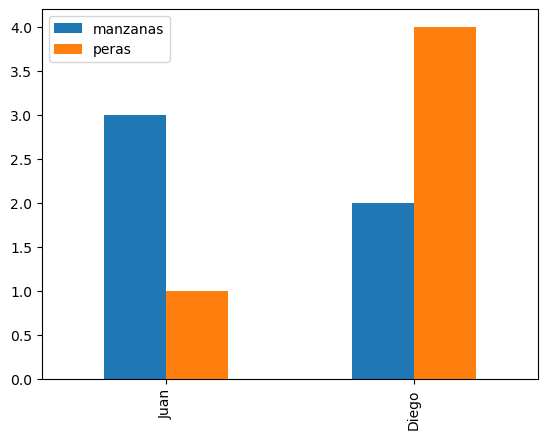

In [2]:
datos.plot.bar()